In [108]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from overprot.libs import lib_pymol

In [3]:
struct = lib_pymol.read_cif('/home/adam/Workspace/Python/OverProt/data/GuidedClustering/cyp_50/cif_cealign/1c8jB00.alphas.cif')

In [4]:
def smooth(coords):
    new = np.zeros_like(coords)
    k = 5
    for i in range(k):
        new[:, k//2:-k//2] += coords[:, i: -k+i]
    new /= k
    new[:, :k//2] = coords[:, :k//2]
    new[:, -k//2:] = coords[:, -k//2:]
    return new

In [5]:
def to_spherical(coords: np.ndarray, origin: np.ndarray) -> np.ndarray:
    d, n = coords.shape
    origin= origin.reshape((d, 1))
    coords = coords - origin
    r = np.sqrt(np.sum(coords**2, axis=0))
    theta = np.arccos(coords[2, :] / r)
    phi = np.arctan2(coords[1,:], coords[0,:])
    re_xyz = np.array([
        r*np.sin(theta)*np.cos(phi),
        r*np.sin(theta)*np.sin(phi),
        r*np.cos(theta)
    ])
    print(np.max(re_xyz - coords), np.min(re_xyz - coords))
    return np.array([r, theta, phi])

In [6]:
def plot_coords(coords, figure=None, eqax=True, line=True, points=True):
    figure = figure or plt.figure(figsize=(12, 12))
    X, Y, *_ = coords
    n = len(X)
    if line:
        plt.plot(X, Y, color='grey')
    if points:
        plt.scatter(X, Y, c=np.arange(n), cmap='rainbow')
        plt.scatter(X[0], Y[0], color='black')
        plt.scatter(X[-1], Y[-1], color='black')
    if eqax:
        plt.axis('equal')

/tmp/ipykernel_14279/1046331153.py:33: RuntimeWarning: invalid value encountered in less_equal
  plot_on_sphere1(x, z, size, y<=0, plts[0,0], side_grid=True)
/tmp/ipykernel_14279/1046331153.py:35: RuntimeWarning: invalid value encountered in greater_equal
  plot_on_sphere1(y, z, size, x>=0, plts[0,1], side_grid=True)
/tmp/ipykernel_14279/1046331153.py:37: RuntimeWarning: invalid value encountered in greater_equal
  plot_on_sphere1(-x, z, size, y>=0,  plts[0,2], side_grid=True)
/tmp/ipykernel_14279/1046331153.py:39: RuntimeWarning: invalid value encountered in less_equal
  plot_on_sphere1(-y, z, size, x<=0, plts[1,0], side_grid=True)
/tmp/ipykernel_14279/1046331153.py:41: RuntimeWarning: invalid value encountered in greater_equal
  plot_on_sphere1(y, -x, size, z>=0, plts[1,1], top_grid=True)
/tmp/ipykernel_14279/1046331153.py:43: RuntimeWarning: invalid value encountered in less_equal
  plot_on_sphere1(y, x, size, z<=0, plts[1,2], top_grid=True)


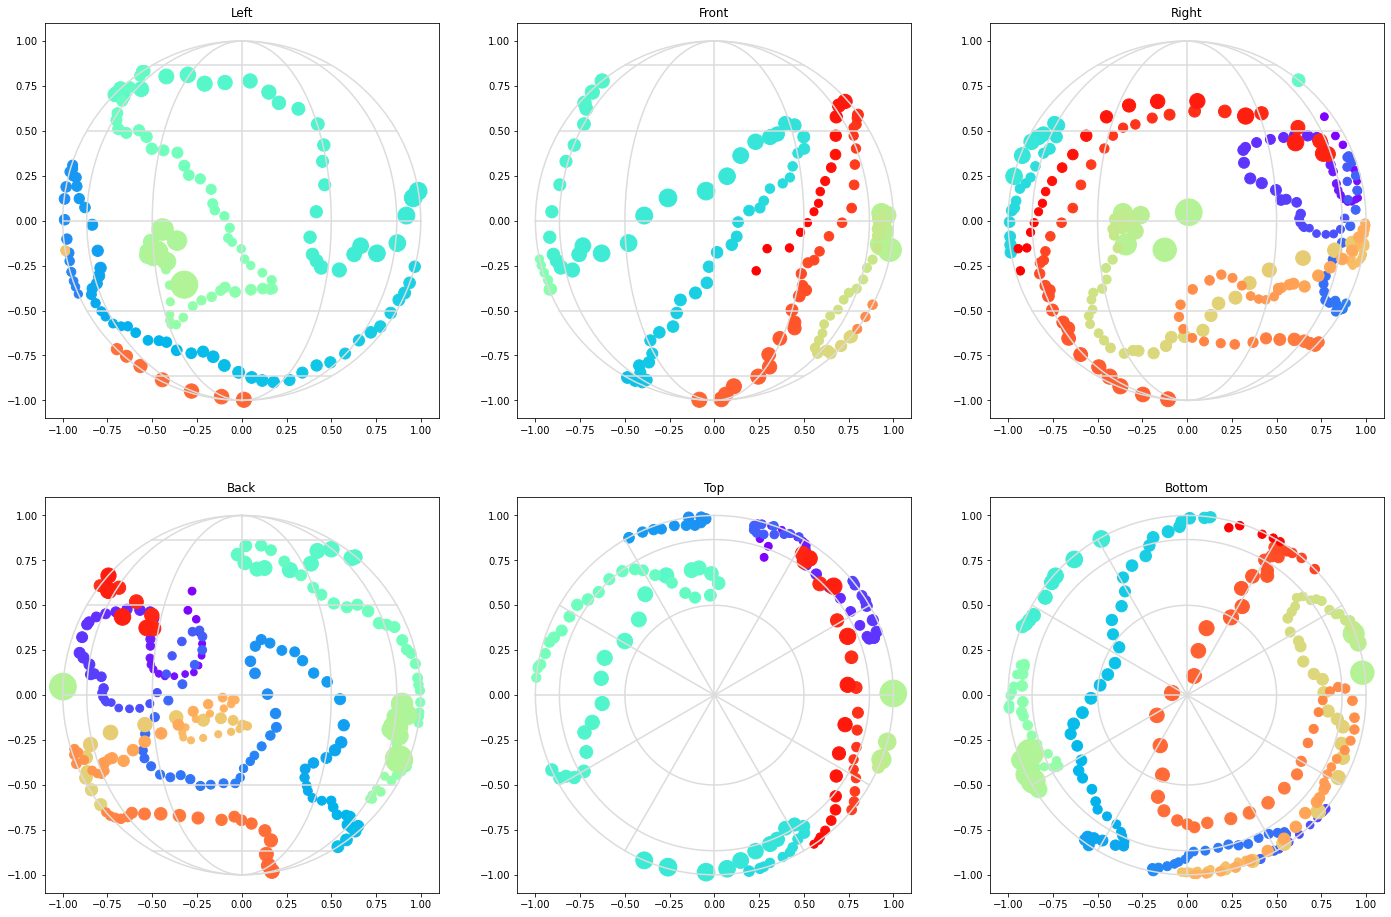

In [125]:
def plot_on_sphere1(x, y, s, mask, plt, side_grid=False, top_grid=False, line=False):
    idx = np.linspace(0, 1, num=len(x))
    t = np.linspace(0, 2*np.pi, num=100)
    grids = []
    grids.append(( np.cos(t), np.sin(t) ))
    if side_grid:
        for i in [-2, -1, 0, 1, 2]:
            a = i*np.pi/6
            grids.append(( (np.cos(a), -np.cos(a)), (np.sin(a), np.sin(a)) ))
        t = np.linspace(0, np.pi, num=50)
        for i in [-2, -1, 0, 1, 2]:
            a = i*np.pi/6
            grids.append(( np.sin(a)*np.sin(t), np.cos(t) ))
    if top_grid:
        for i in [1, 2]:
            a = i*np.pi/6
            grids.append(( np.cos(a)*np.cos(t), np.cos(a)*np.sin(t) ))
        for i in range(12):
            a = i*np.pi/6
            grids.append(( [0, np.cos(a)], [0, np.sin(a)] ))
    for sx, sy in grids:
        plt.plot(sx, sy, color='gainsboro')
    if line:
        plt.plot(x, y, color='gray')
    plt.scatter(x[mask], y[mask], s=s[mask], c=idx[mask], cmap='rainbow', norm=matplotlib.colors.Normalize(0, 1))

def plot_on_sphere(theta, phi, size=1):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    fig, plts = plt.subplots(2, 3, figsize=(24, 16))
    plts[0,0].set_title('Left')
    plot_on_sphere1(x, z, size, y<=0, plts[0,0], side_grid=True)
    plts[0,1].set_title('Front')
    plot_on_sphere1(y, z, size, x>=0, plts[0,1], side_grid=True)
    plts[0,2].set_title('Right')
    plot_on_sphere1(-x, z, size, y>=0,  plts[0,2], side_grid=True)
    plts[1,0].set_title('Back')
    plot_on_sphere1(-y, z, size, x<=0, plts[1,0], side_grid=True)
    plts[1,1].set_title('Top')
    plot_on_sphere1(y, -x, size, z>=0, plts[1,1], top_grid=True)
    plts[1,2].set_title('Bottom')
    plot_on_sphere1(y, x, size, z<=0, plts[1,2], top_grid=True)

# plot_on_sphere(theta, -phi, r**(-2) * 20_000)
plot_on_sphere(theta, -phi, (r+10)**(-2) * 10**5)
# plot_on_sphere(theta, -phi, r**(-1) * 2500)

In [9]:
coords = struct.coords
smooth_coords = smooth(coords)

nan nan


/tmp/ipykernel_14279/3709268848.py:6: RuntimeWarning: invalid value encountered in true_divide
  theta = np.arccos(coords[2, :] / r)


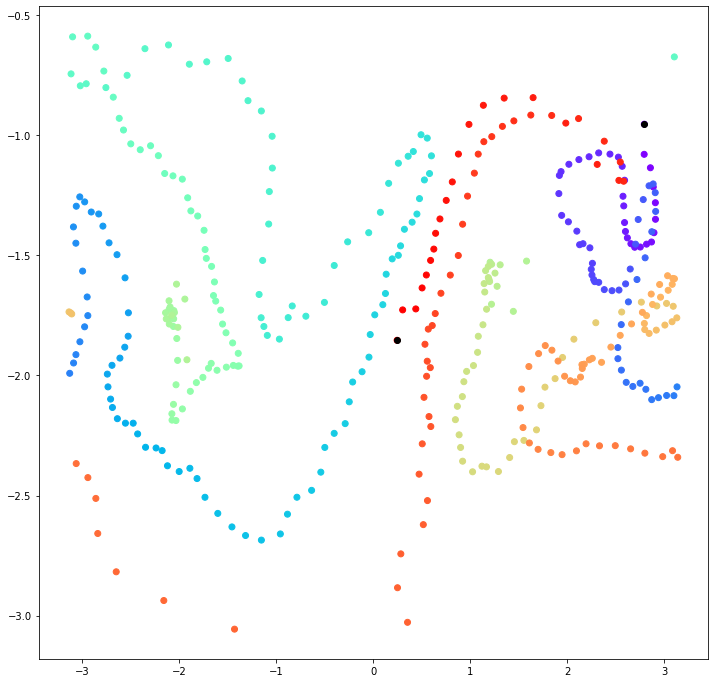

In [122]:
rtf = to_spherical(smooth_coords, smooth_coords[:,242])
r, theta, phi = rtf
plot_coords(np.array([-phi, -theta]), eqax=False, line=False)

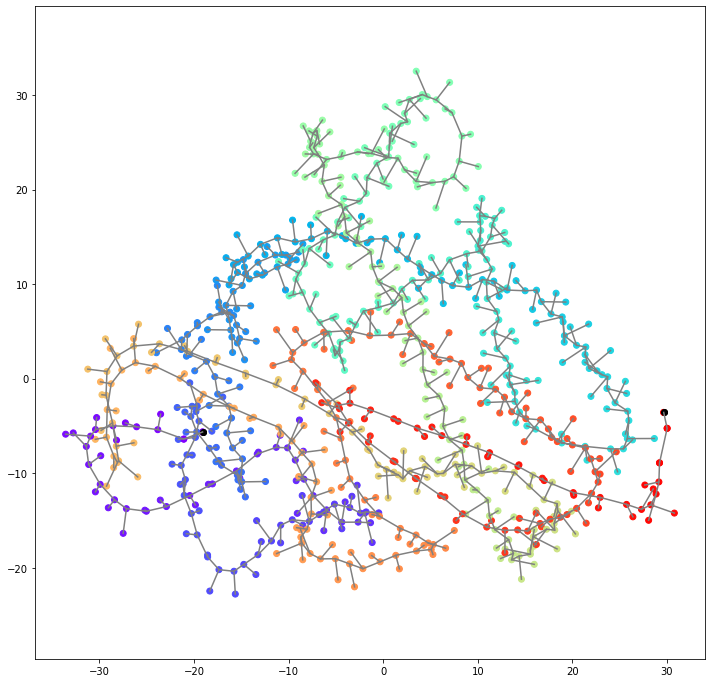

In [130]:
fig = plt.figure(figsize=(12, 12))
plot_coords(struct.coords, figure=fig, line=False)
plot_coords(smooth(struct.coords), figure=fig)
for i in range(coords.shape[1]):
    plt.plot([coords[0,i],smooth_coords[0,i]], [coords[1,i], smooth_coords[1,i]], color='grey')